
# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Data visualization: design and implementation practice
Week 12 | Exercise 1.0



## Introduction

In this folder are five CSVs, each with data on a single customer of a cellular phone plan.$^*$

Some non-obvious feature names are:
- vc = voice call
- rc_amount = amount recharged
- offerAmount = minimum recharge amount to qualify for special marketing offer

And here are some [helpful reminders](https://cdn2.hubspot.net/hub/53/file-863940581-pdf/Data_Visualization_101_How_to_Design_Charts_and_Graphs.pdf) of best practice for basic visualizations. (Except they call choropleths "heat maps"...)

$^*$ This is sourced from an online contest.

## Challenge

Visualize this! You may use any tool you want, although Python + visualization libraries are encouraged.

Think about:

- What information you want to represent
- Who would use this information, and how
- Making this presentation tidy and intuitive
- What would happen if you had lots more data of the same format
- What would happen if your client had more data of a slightly different format

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
bl = pd.read_csv('balance.csv')
bl.head()

,timestamp,balance
0,2013-05-01 05:00:01,28.559999
1,2013-05-02 05:00:01,23.209999
2,2013-05-03 05:00:01,18.450001
3,2013-05-04 00:33:44,8.920000
4,2013-05-04 00:33:45,58.919998


In [3]:
fl = pd.read_csv('filled.csv')
fl.head()

,timestamp,rc_amount,offerUnits,offerAmount,qualifying_rc_date,adjustment_date,days_to_adjust,expiryDate
0,2013-06-14 05:48:16,30.0,credit,8.0,2013-06-14 18:53:32,2013-06-20 12:20:21,5,2013-06-19 05:48:16
1,2013-06-20 07:11:31,50.0,credit,15.0,2013-06-20 19:18:46,2013-06-30 13:52:36,9,2013-06-25 07:11:31
2,2013-06-27 07:19:29,20.0,credit,5.0,2013-06-27 09:24:36,2013-07-04 16:37:55,7,2013-07-12 07:19:29
3,2013-07-15 06:09:24,20.0,credit,5.0,2013-07-15 16:03:32,2013-07-19 12:33:46,3,2013-07-30 06:09:24
4,2013-08-19 06:21:39,50.0,sms,15.0,2013-08-19 13:53:37,2013-08-22 19:41:10,3,2013-08-24 06:21:39


In [4]:
nf = pd.read_csv('not_filled.csv')
nf

,timestamp,rc_amount,offerUnits,offerAmount,qualifying_recharge,expiryDate
0,2013-08-01 05:50:36,20.0,credit,5.0,True,2013-08-16 05:50:36


In [5]:
r = pd.read_csv('recharges.csv')
r.head()

,timestamp,voucher_label,voucher_value
0,2013-05-04 00:32:16,SELLER,50.0
1,2013-05-09 02:14:26,BODCELU,20.0
2,2013-05-11 21:32:55,SELLER,50.0
3,2013-05-18 16:11:50,WALTMART,50.0
4,2013-05-20 14:43:52,SELLER,50.0


In [6]:
u = pd.read_csv('usage.csv')
u.head()

,timestamp,inbound_sms_count,inbound_vc_minutes,outbound_sms_count,outbound_vc_minutes,in_network_inbound_sms_count,out_of_network_inbound_sms_count,in_network_outbound_sms_count,out_of_network_outbound_sms_count,in_network_inbound_vc_minutes,out_of_network_inbound_vc_minutes,in_network_outbound_vc_minutes,out_of_network_outbound_vc_minutes
0,2013-03-31,0,5.050000,0.0,0.700000,0,0,0,0.0,4,1.050000,0,0.700000
1,2013-04-01,0,4.583333,0.0,0.666667,0,0,0,0.0,4,0.583333,0,0.666667
2,2013-04-02,0,1.866667,0.0,3.750000,0,0,0,0.0,1,0.866667,2,1.750000
3,2013-04-03,0,0.000000,0.0,0.733333,0,0,0,0.0,0,0.000000,0,0.733333
4,2013-04-04,0,0.000000,0.0,1.533333,0,0,0,0.0,0,0.000000,0,1.533333


In [20]:
u.index = u['timestamp']
del u['timestamp']

In [25]:
r.index = r['timestamp']
del r['timestamp']

In [26]:
nf.index = nf['timestamp']
del nf['timestamp']

In [21]:
u.head()

,inbound_sms_count,inbound_vc_minutes,outbound_sms_count,outbound_vc_minutes,in_network_inbound_sms_count,out_of_network_inbound_sms_count,in_network_outbound_sms_count,out_of_network_outbound_sms_count,in_network_inbound_vc_minutes,out_of_network_inbound_vc_minutes,in_network_outbound_vc_minutes,out_of_network_outbound_vc_minutes
timestamp,,,,,,,,,,,,
2013-03-31,0,5.050000,0.0,0.700000,0,0,0,0.0,4,1.050000,0,0.700000
2013-04-01,0,4.583333,0.0,0.666667,0,0,0,0.0,4,0.583333,0,0.666667
2013-04-02,0,1.866667,0.0,3.750000,0,0,0,0.0,1,0.866667,2,1.750000
2013-04-03,0,0.000000,0.0,0.733333,0,0,0,0.0,0,0.000000,0,0.733333
2013-04-04,0,0.000000,0.0,1.533333,0,0,0,0.0,0,0.000000,0,1.533333


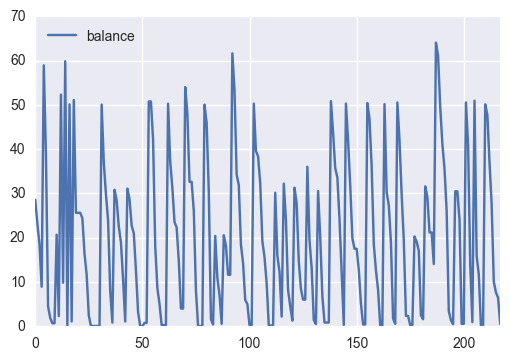

In [7]:
bl.plot()

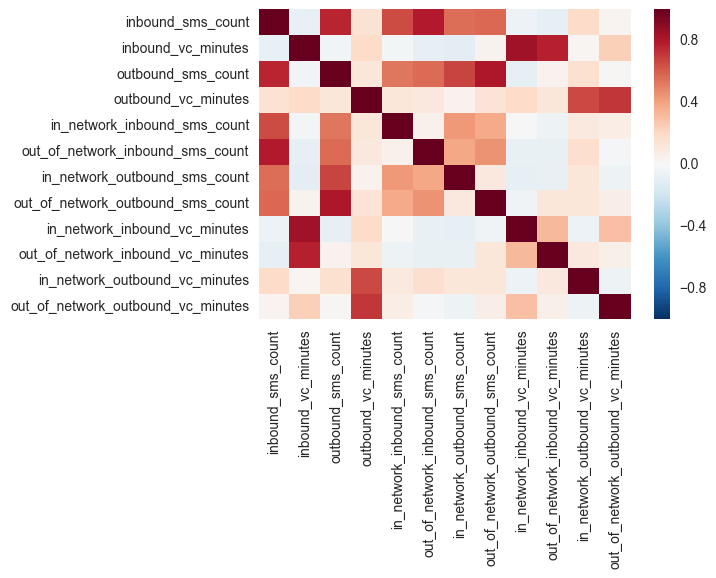

In [13]:
u_corr = u.corr()
sns.heatmap(u_corr)

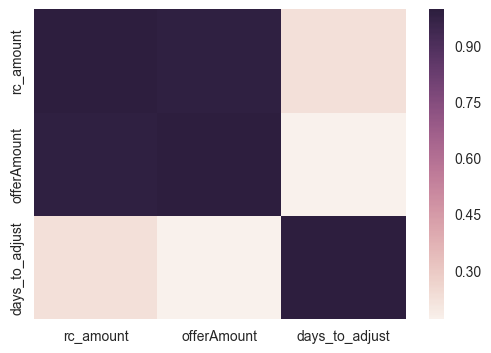

In [14]:
fl_corr = fl.corr()
sns.heatmap(fl_corr)

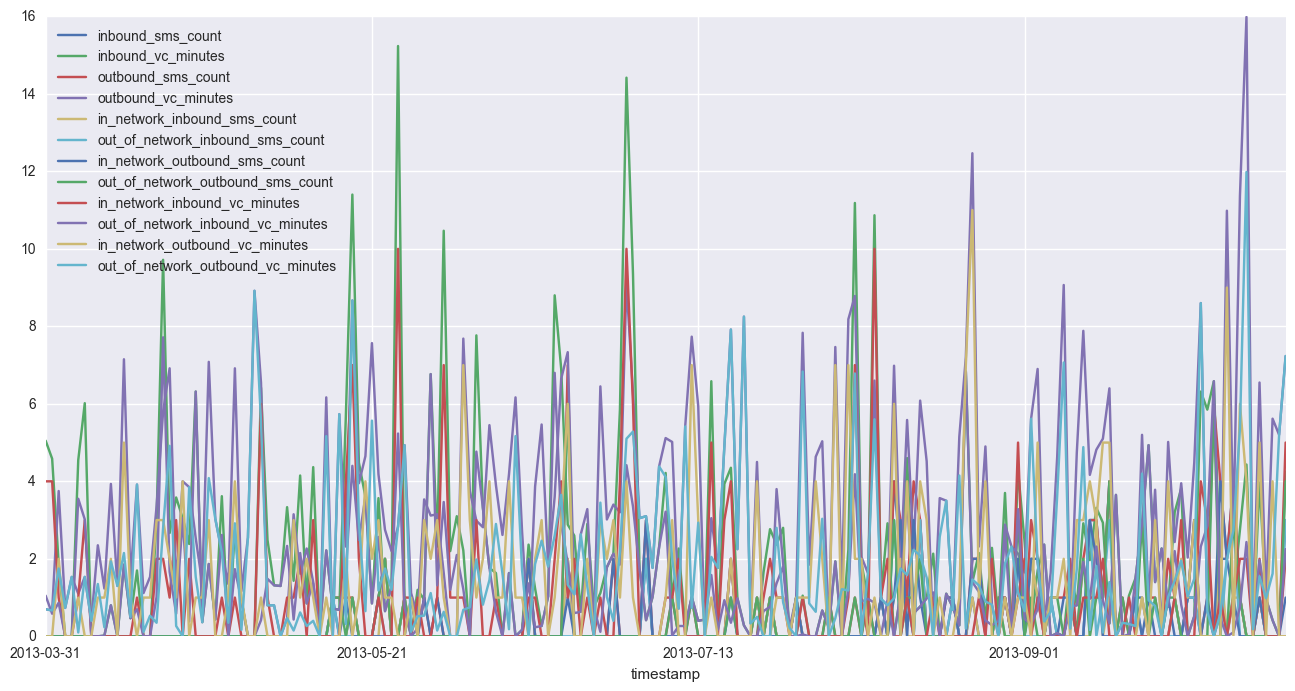

In [24]:
u.plot(figsize=(16,8))

In [16]:
pd.pivot_table(fl, values=['offerUnits','offerAmount'], index=)

SyntaxError: non-keyword arg after keyword arg (<ipython-input-16-4f37fbeefaeb>, line 1)

http://stsdas.stsci.edu/download/mdroe/plotting/entry11/index.html